In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
train_data = pd.read_csv(r'C:\Users\91934\Downloads\train (1).csv')
test_data = pd.read_csv(r'C:\Users\91934\Downloads\test (1).csv')

In [5]:
print(train_data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [9]:
print(train_data.columns)  


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
train_data['TotalBath'] = train_data['FullBath'] + train_data['HalfBath'] * 0.5

In [11]:
columns_to_check = ['GrLivArea', 'BedroomAbvGr', 'TotalBath']
for column in columns_to_check:
    if column not in train_data.columns:
        raise ValueError(f"Column {column} is not in the dataset")



In [12]:
X = train_data[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]
y = train_data['SalePrice']



In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X_val)

In [16]:
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2848523443.4191


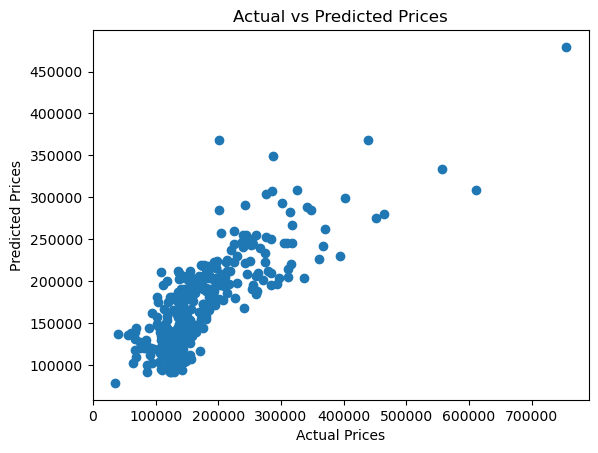

In [17]:
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [18]:
test_data['TotalBath'] = test_data['FullBath'] + test_data['HalfBath'] * 0.5


In [19]:
for column in columns_to_check:
    if column not in test_data.columns:
        raise ValueError(f"Column {column} is not in the test dataset")


In [20]:
X_test = test_data[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]


In [21]:
test_predictions = model.predict(X_test)



In [22]:
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})


In [26]:
submission.to_csv(r'C:\Users\91934\Downloads\sample_submission (1).csv', index=False)
